<a href="https://colab.research.google.com/github/MichelSantos87/IA/blob/main/CA_751_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico de Aeronáutica**

Divisão de Ciência da Computação (IEC)

Disciplina: CA-751 Inteligência Artificial

Prof. Carlos Henrique Costa Ribeiro

Trabalho Final - 15 de Julho de 2022

Alunos:
* Adelti Assis Silva
* Lucas Fontoura Goulart
* Michel Santos da Silva


# Instalação e inicialização dos pacotes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve
from itertools import cycle, islice
import imblearn
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
import plotly.graph_objects as go 
import plotly.express as px 

# Importação do Dataset e inspeção inicial do dataset

##Importação do Dataset

Link do Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv

In [ ]:
#Realizar a leitura do Dataset e salvar no dataframe 'dataset' 
dataset_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv')

##Inspeção inicial do Dataset

In [ ]:
#Inspeção inicial do Dataset
dataset_original.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [ ]:
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
dataset_original.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

**Observações:**

*   Não existe dados faltantes.
*   UDI e Product ID são únicos para cada instância do dataset.




##Tratamento dos dados

Decodificação das falhas com a criação de um novo atributo, Failure Type. Tratamento de inconsistências.

In [ ]:
dataset_FT = pd.DataFrame()
dataset_FT=dataset_original
falha_lista = [] 
for index,row in dataset_FT.iterrows():
    falha = 'No Failure'
    if row['TWF'] == 1:
      falha = 'Tool Wear Failure'
    elif row['HDF'] == 1:
      falha = 'Heat Dissipation Failure'
    elif row['PWF'] == 1:
      falha = 'Power Failure'
    elif row['OSF'] == 1:
      falha = 'Overstrain Failure'
    elif row['RNF'] == 1:  
      falha = 'Random Failure'
    #importante separa por causa da classificacao da variavel falha
    if falha != 'No Failure' and row['Machine failure'] ==0:
      dataset_FT['Machine failure'][index] =1
    elif falha == 'No Failure' and row['Machine failure'] ==1:
      falha = 'No Information'
    falha_lista.append(falha)
dataset_FT['Failure Type'] = falha_lista

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset_FT.describe(include='all')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Failure Type
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Failure
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9643
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.03570,0.004600,0.011500,0.009500,0.009800,0.00190,NaN
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.18555,0.067671,0.106625,0.097009,0.098514,0.04355,NaN
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN


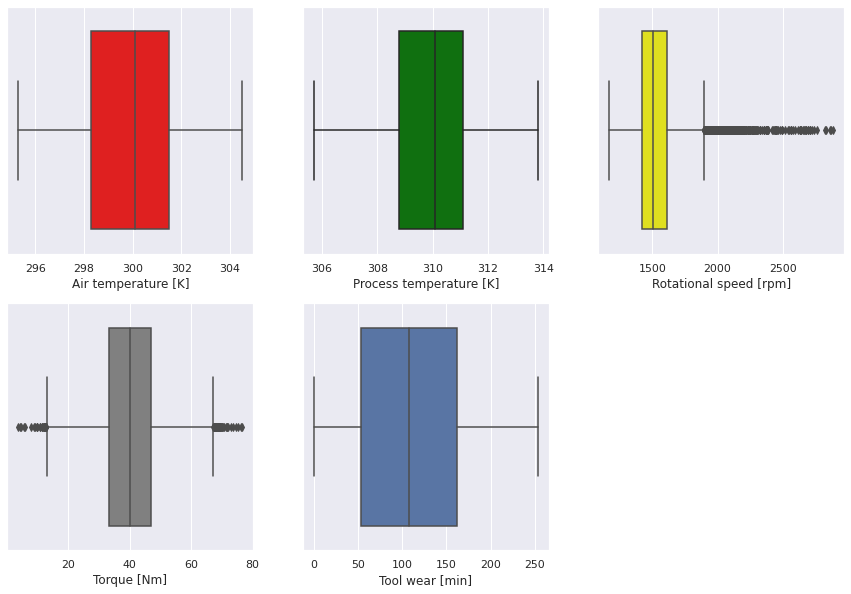

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'Air temperature [K]', data = dataset_FT, color='red')
plt.subplot(2,3,2)
sns.boxplot(x = 'Process temperature [K]', data = dataset_FT,color='green')
plt.subplot(2,3,3)
sns.boxplot(x = 'Rotational speed [rpm]', data = dataset_FT, color='yellow')
plt.subplot(2,3,4)
sns.boxplot(x = 'Torque [Nm]', data = dataset_FT,color='gray')
plt.subplot(2,3,5)
sns.boxplot(x = 'Tool wear [min]', data = dataset_FT)

Remoção dos outliers

In [ ]:
dataset = pd.DataFrame()
dataset = dataset_FT

Remoção de atributos não necessários para análise

In [ ]:
#Atributos decodificados
del dataset['TWF']
del dataset['HDF']
del dataset['PWF']
del dataset['OSF']
del dataset['RNF']
#Atributos únicos
del dataset['UDI']
del dataset['Product ID']
dataset.reset_index(inplace=True, drop=True)

#Análise Exploratória dos Dados

##Exploração dos dados

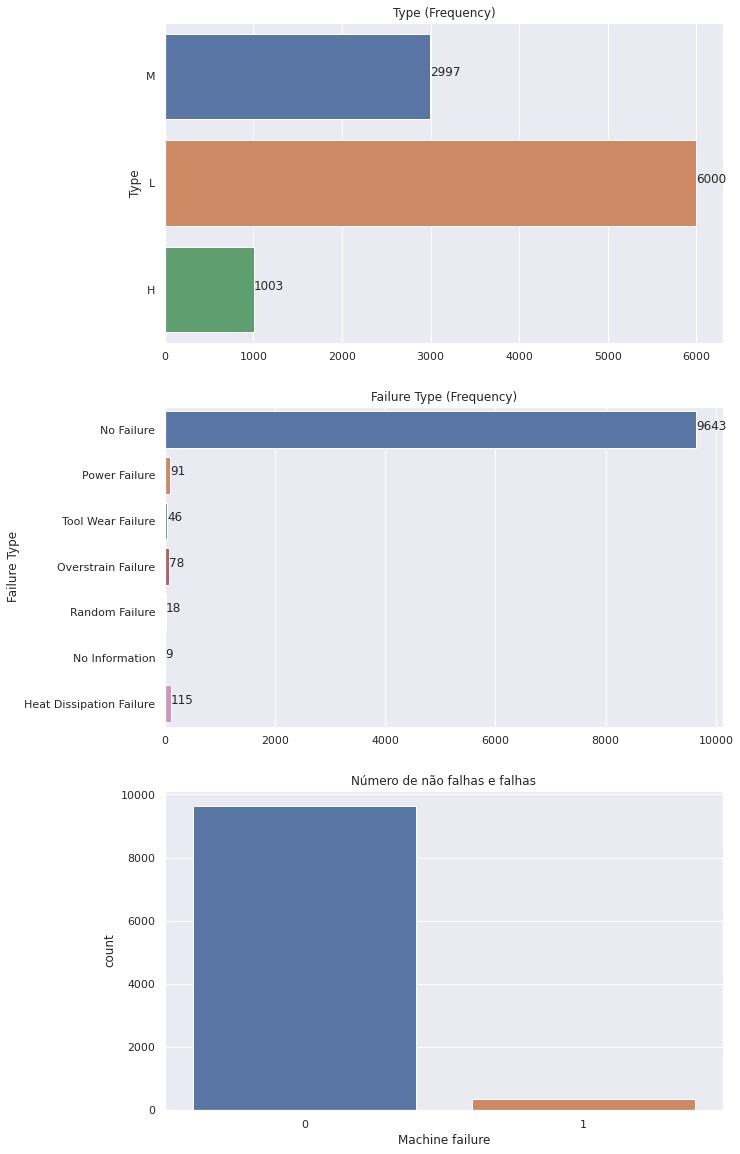

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
pl1 = sns.countplot(y=dataset_FT["Type"])
pl1.set_title("Type (Frequency)")
pl1.set(xlabel=None)
for p in pl1.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        pl1.annotate(percentage, (x, y))
plt.subplot(3,1,2)
pl2 = sns.countplot(y=dataset_FT["Failure Type"])
pl2.set_title("Failure Type (Frequency)")
pl2.set(xlabel=None)
for p in pl2.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        pl2.annotate(percentage, (x, y))
plt.subplot(3,1,3)
plt3 = sns.countplot(x='Machine failure', data=dataset)
plt3.set_title("Número de não falhas e falhas")
plt.show()


Observação:

O desbalanceamento dos dados em relação ao target “Machine Failure” é uma realidade comum para problemas de tratamento de dados vindos da manutenção. Para condições normais de operação de um equipamento ou máquina é esperado que seu tempo de operação seja muito maior que o tempo de parada de manutenção. A natureza desta operação consequentemente reflete na coleta de dados.

In [ ]:
fig = px.box(dataset,
             y      =  "Air temperature [K]",
             x      =  "Machine failure",
             title  =  "Air Temperature relation with Machine Failure and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

In [ ]:
fig = px.box(dataset,
             y      =  "Rotational speed [rpm]",
             x      =  "Machine failure",
             title  =  "Rotational speed [rpm] relation with Machine Failure and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

In [ ]:
fig = px.box(dataset,
             y      =  "Process temperature [K]",
             x      =  "Machine failure",
             title  =  "Process temperature [K] relation with Machine Failure and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

In [ ]:
fig = px.box(dataset,
             y      =  "Torque [Nm]",
             x      =  "Machine failure",
             title  =  "Torque [Nm] relation with Machine Failure and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

In [ ]:
fig = px.box(dataset,
             y      =  "Tool wear [min]",
             x      =  "Machine failure",
             title  =  "Tool wear [min] relation with Machine Failure and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

##Correlação

Como o objetivo principal do presente trabalho é estimar a probabilidade de falha, iremos realizar a observação da correlação entre variáveis separadas falha ou não falha.

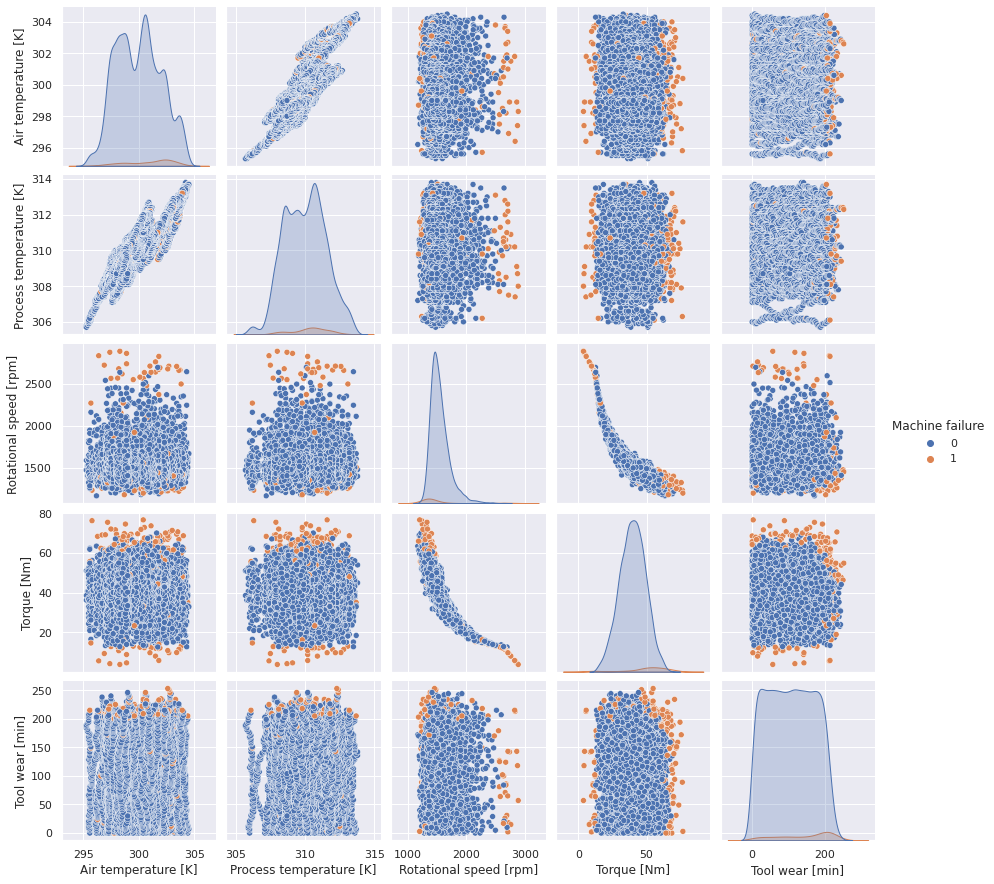

In [ ]:
sns.pairplot(dataset, hue='Machine failure')

Observações:

Percebe-se uma forte correlação entre os atributos Air Temperarture [K] e Process Temperature [K], e também entre o Torque [Nm] e o Rotation speed [rpm].

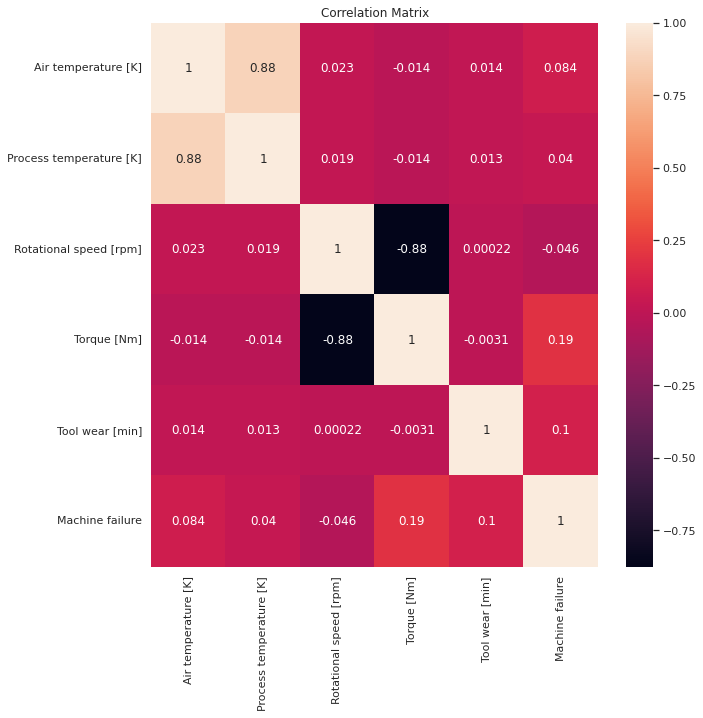

In [ ]:
plt.figure(figsize=(10,10))
pl = sns.heatmap(dataset.corr(), annot=True)
pl.set_title("Correlation Matrix")
plt.show()

##Transformando variáveis

Para tratar o fenômeno observado assima realizamos a transformação das variáveis que possuem alta correlação.

In [ ]:
dataset_transf=pd.DataFrame()
dataset_transf = dataset
#Calculo do delta temperature [k]
dataset_transf['Delta Temperature'] = dataset['Process temperature [K]'] - dataset['Air temperature [K]']
del dataset_transf['Air temperature [K]']
del dataset_transf['Process temperature [K]']

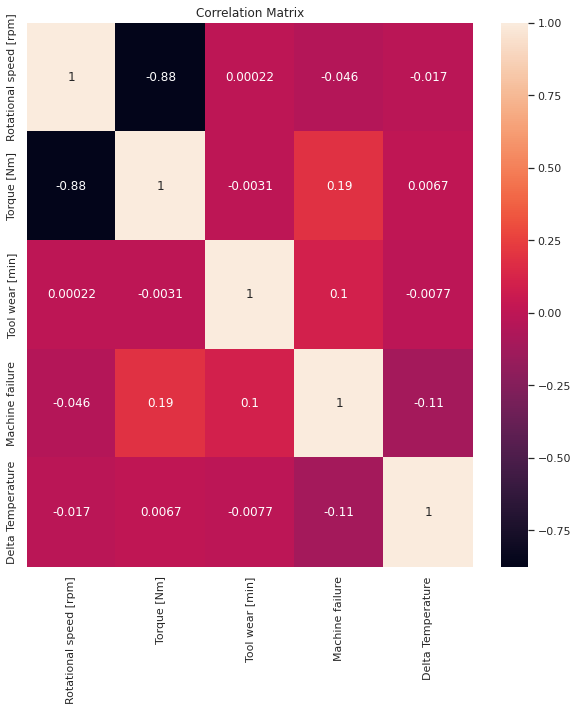

In [ ]:
plt.figure(figsize=(10,10))
pl = sns.heatmap(dataset_transf.corr(), annot=True)
pl.set_title("Correlation Matrix")
plt.show()

In [ ]:
#adição de nova coluna com o o Rotational speed em Rad/s
dataset_transf['Rotational speed [Rad/s]'] = ((dataset_transf['Rotational speed [rpm]']) * 0.104719755120)
# calculo da potencia do processo
dataset_transf['Rotational Power'] = ((dataset_transf['Rotational speed [Rad/s]'])* dataset_transf['Torque [Nm]'])

In [ ]:
del dataset_transf['Rotational speed [Rad/s]']
del dataset_transf['Torque [Nm]']
del dataset_transf['Rotational speed [rpm]']

In [ ]:
#apenas para reordenar o dataset
dataset_transf = dataset_transf[['Tool wear [min]', 'Delta Temperature','Rotational Power','Machine failure']]

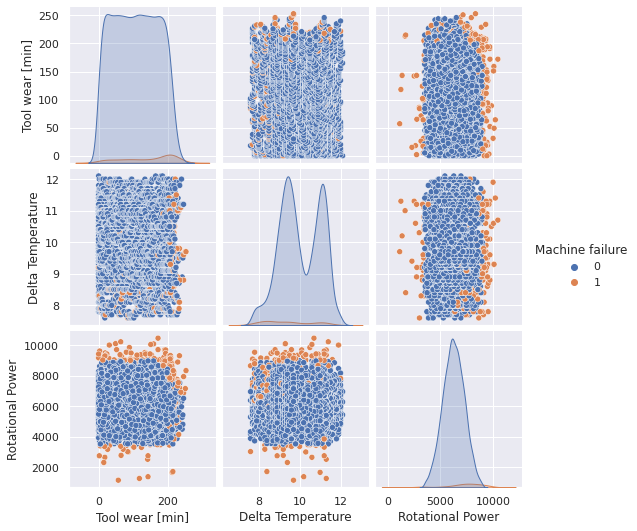

In [ ]:
sns.pairplot(dataset_transf, hue='Machine failure')

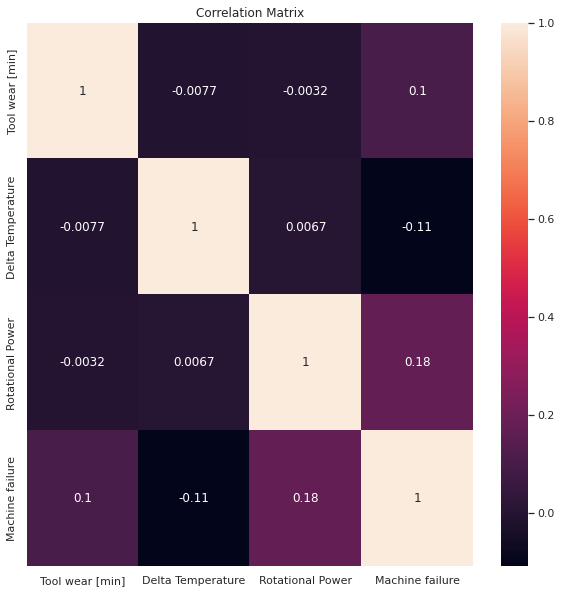

In [ ]:
plt.figure(figsize=(10,10))
pl = sns.heatmap(dataset_transf.corr(), annot=True)
pl.set_title("Correlation Matrix")
plt.show()

----- SKEWNESS ------------
Delta Temperature skewness = -0.07
Rotational Power skewness = 0.01
Tool wear [min] skewness = 0.03
---------------------------


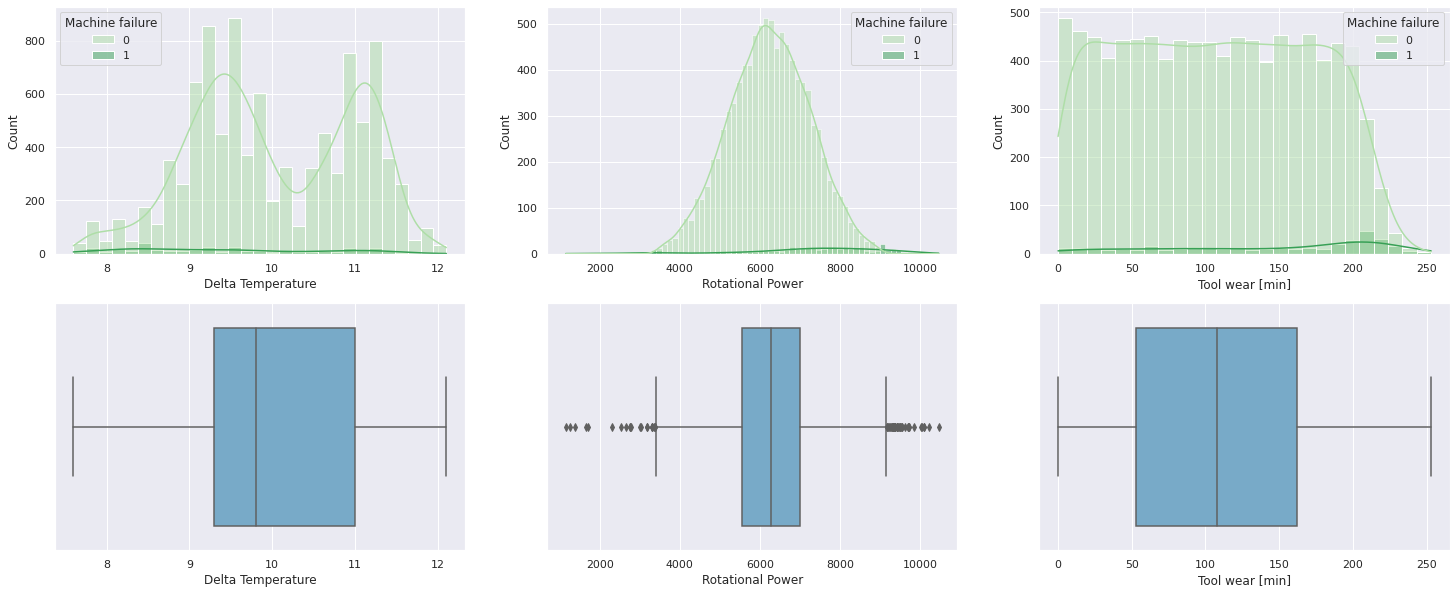

In [ ]:
print('----- SKEWNESS ------------')
fig, axes = plt.subplots(2, 3, figsize=[25,10])
j = 0
colors = ['#E1728F', '#409E7D']

for i in ['Delta Temperature', 'Rotational Power', 'Tool wear [min]']:
    sns.histplot(data=dataset_transf, x=i, kde=True, ax=axes[0,j], hue='Machine failure', palette="Greens")
    sns.boxplot(data=dataset_transf, x=i, ax=axes[1,j], palette="Blues")
    j+=1
    print('{} skewness = {}'.format(i, round(dataset_transf[i].skew(), 2)))
print('---------------------------')

#Experimento 1 - Dataset desbalanceado

##Preparação Experimento

Proporção do atributo de saída do Dataset

In [ ]:
dataset_exp1 = pd.DataFrame()
dataset_exp1 = dataset_transf

Proporção do atributo de saída do Dataset:

- No Failure: 9643
- Failure: 357

Proportion: 27.01 : 1


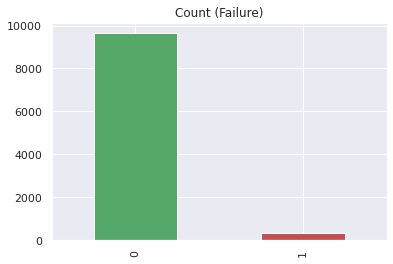

In [ ]:
target_count_exp1 = dataset_exp1['Machine failure'].value_counts()
print('Proporção do atributo de saída do Dataset:\n',)
print('- No Failure:', target_count_exp1[0])
print('- Failure:', target_count_exp1[1])
print('\nProportion:', round(target_count_exp1[0] / target_count_exp1[1], 2), ': 1')


my_colors = list(islice(cycle(['g', 'r']), None, len(dataset_exp1)))
target_count_exp1.plot(kind='bar', title='Count (Failure)', color=my_colors);

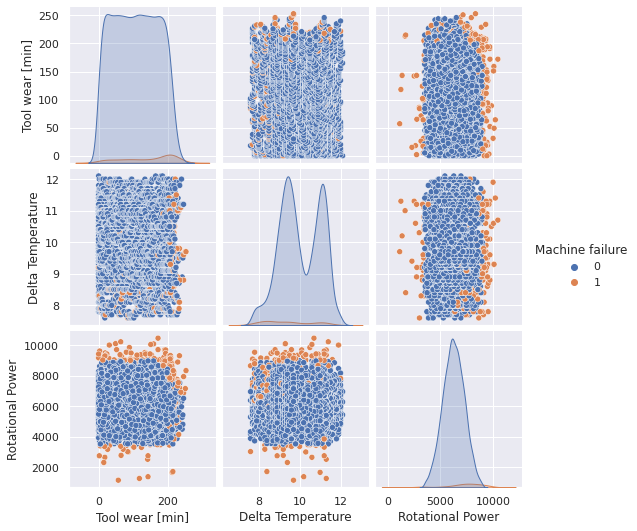

In [ ]:
sns.pairplot(dataset_exp1, hue='Machine failure')

Dividir o dataset em entradas e saídas

In [ ]:
X_exp1 = dataset_exp1.iloc[:, [0,1,2]]
y_exp1 = dataset_exp1.iloc[:, 3]

Divisão do dataset para teste e treinamento

In [ ]:
#Dados de teste com 66% da amostra
X_train_exp1, X_test_exp1, y_train_exp1, y_test_exp1 =train_test_split(X_exp1,y_exp1,test_size= 0.66, random_state=1)

Propoção do atributo de saída dos dados de teste

In [ ]:
#Test
y_test_Array_exp1=np.array(y_test_exp1)
np.count_nonzero(y_test_Array_exp1)
print('Proporção do atributo de saída dos dados de testes:\n',)
print('- No Failure:', y_test_Array_exp1[np.where(y_test_Array_exp1 == 0)].size)
print('- Failure:', np.count_nonzero(y_test_Array_exp1))
print('\nProportion:', round(y_test_Array_exp1[np.where(y_test_Array_exp1 == 0)].size / np.count_nonzero(y_test_Array_exp1), 2), ': 1')


Proporção do atributo de saída dos dados de testes:

- No Failure: 6357
- Failure: 243

Proportion: 26.16 : 1


Propoção do atributo de saída dos dados de treinamento

In [ ]:
#Train
y_train_Array_exp1=np.array(y_train_exp1)
np.count_nonzero(y_train_Array_exp1)
print('Proporção do atributo de saída dos dados de treinamento:\n',)
print('- No Failure:', y_train_Array_exp1[np.where(y_train_Array_exp1 == 0)].size)
print('- Failure:', np.count_nonzero(y_train_Array_exp1))
print('\nProportion:', round(y_train_Array_exp1[np.where(y_train_Array_exp1 == 0)].size / np.count_nonzero(y_train_Array_exp1), 2), ': 1')

Proporção do atributo de saída dos dados de treinamento:

- No Failure: 3286
- Failure: 114

Proportion: 28.82 : 1


##Gaussian Classifier

In [ ]:
# create a Gaussian Classifier
classifer_exp1 = GaussianNB()
# training the model
classifer_exp1.fit(X_train_exp1, y_train_exp1)
# testing the model
y_pred_exp1 = classifer_exp1.predict(X_test_exp1)

##Avaliação de resultados - Experimento 1

Avaliação dos resultados Experimento 1 - Dataset Original

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6357
           1       0.95      0.09      0.16       243

    accuracy                           0.97      6600
   macro avg       0.96      0.54      0.57      6600
weighted avg       0.97      0.97      0.95      6600



Text(0.5, 21.5, 'Prediction')

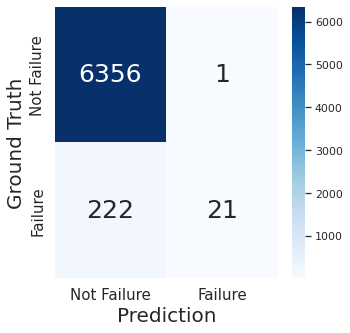

In [ ]:
print('Avaliação dos resultados Experimento 1 - Dataset Original\n')
print(classification_report(y_test_exp1, y_pred_exp1))
M_exp1 = confusion_matrix(y_test_exp1, y_pred_exp1)
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(M_exp1, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 25, "weight": "normal"})

labels = ['Not Failure', 'Failure']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)

#Experimento 2 - Random over-sampling

##Preparação Experimento

In [ ]:
dataset_exp2 = pd.DataFrame()
dataset_exp2 = dataset_transf

In [ ]:
X_exp2 = dataset_exp2.iloc[:, [0,1,2]]
y_exp2 = dataset_exp2.iloc[:, 3]

In [ ]:
X_train_exp2, X_test_exp2, y_train_exp2, y_test_exp2 =train_test_split(X_exp2,y_exp2,test_size= 0.66, random_state=0)

In [ ]:
#Test
y_test_Array_exp2=np.array(y_test_exp2)
np.count_nonzero(y_test_Array_exp2)
print('Test data\n')
print('- No Failure:', y_test_Array_exp2[np.where(y_test_Array_exp2 == 0)].size)
print('- Failure:', np.count_nonzero(y_test_Array_exp2))
print('Proportion:', round(y_test_Array_exp2[np.where(y_test_Array_exp2 == 0)].size / np.count_nonzero(y_test_Array_exp2), 2), ': 1')
print('\n***********************')
#Train
print('\nTrain data\n')
y_train_Array_exp2=np.array(y_train_exp2)
np.count_nonzero(y_train_Array_exp2)
print('- No Failure:', y_train_Array_exp2[np.where(y_train_Array_exp2 == 0)].size)
print('- Failure:', np.count_nonzero(y_train_Array_exp2))
print('Proportion:', round(y_train_Array_exp2[np.where(y_train_Array_exp2 == 0)].size / np.count_nonzero(y_train_Array_exp2), 2), ': 1')

Test data

- No Failure: 6378
- Failure: 222
Proportion: 28.73 : 1

***********************

Train data

- No Failure: 3265
- Failure: 135
Proportion: 24.19 : 1


##Random over-sampling

In [ ]:
dataset_exp2_train= X_train_exp2.join(y_train_exp2)

In [ ]:
# Class count
count_no_failure, count_failure = dataset_exp2_train['Machine failure'].value_counts()
# Divide by class
df_no_failure = dataset_exp2_train[dataset_exp2_train['Machine failure'] == 0]
df_failure = dataset_exp2_train[dataset_exp2_train['Machine failure'] == 1]

Random over-sampling:
0    3265
1    3265
Name: Machine failure, dtype: int64


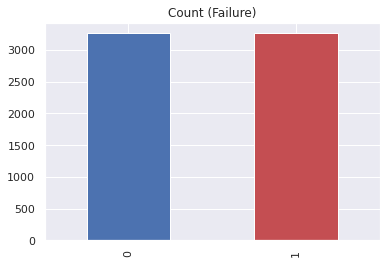

In [ ]:
df_failure_over = df_failure.sample(count_no_failure, replace=True)
dataset_exp2_train_over = pd.concat([df_no_failure, df_failure_over], axis=0)

print('Random over-sampling:')
print(dataset_exp2_train_over['Machine failure'].value_counts())

my_colors = list(islice(cycle(['b', 'r']), None, len(dataset_exp2_train_over)))

dataset_exp2_train_over['Machine failure'].value_counts().plot(kind='bar', title='Count (Failure)', color=my_colors);

In [ ]:
dataset_exp2_train_over.reset_index(inplace=True, drop=True)

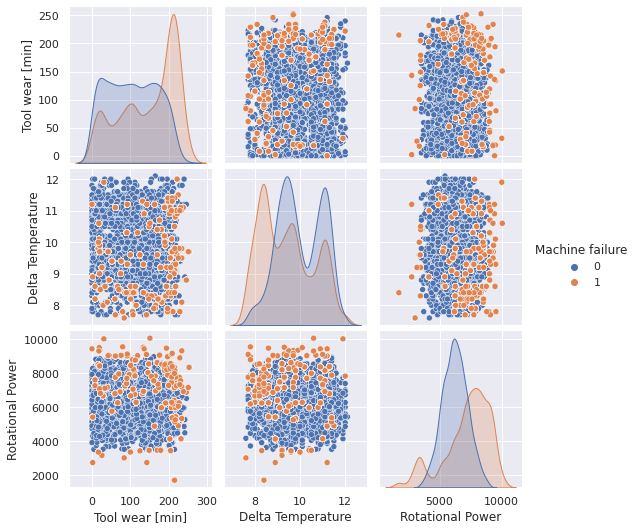

In [ ]:
sns.pairplot(dataset_exp2_train_over, hue='Machine failure')

In [ ]:
# split the data into inputs and outputs
X_exp2_train_over = dataset_exp2_train_over.iloc[:, [0,1,2]]
y_exp2_train_over = dataset_exp2_train_over.iloc[:, 3]

In [ ]:
#Train
print('\nTrain data\n')
y_exp2_train_over_Array=np.array(y_exp2_train_over)
np.count_nonzero(y_exp2_train_over_Array)
print('- No Failure:', y_exp2_train_over_Array[np.where(y_exp2_train_over_Array == 0)].size)
print('- Failure:', np.count_nonzero(y_exp2_train_over_Array))
print('Proportion:', round(y_exp2_train_over_Array[np.where(y_exp2_train_over_Array == 0)].size / np.count_nonzero(y_exp2_train_over_Array), 2), ': 1')


Train data

- No Failure: 3265
- Failure: 3265
Proportion: 1.0 : 1


##Gaussian Classifier

In [ ]:
# create a Gaussian Classifier
classifer_exp2 = GaussianNB()
# training the model
classifer_exp2.fit(X_exp2_train_over, y_exp2_train_over)
# testing the model
y_pred_exp2 = classifer_exp2.predict(X_test_exp2)

##Avaliação de resultados - Experimento 2

Avaliação dos resultados Experimento 2 - Random over-sampling

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      6378
           1       0.13      0.85      0.22       222

    accuracy                           0.80      6600
   macro avg       0.56      0.82      0.55      6600
weighted avg       0.96      0.80      0.86      6600



Text(0.5, 21.5, 'Prediction')

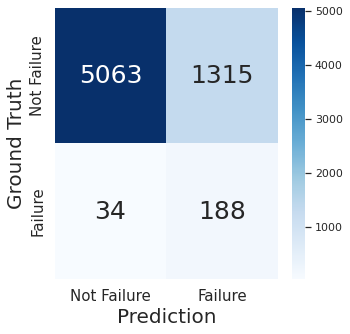

In [ ]:
print('Avaliação dos resultados Experimento 2 - Random over-sampling\n')
print(classification_report(y_test_exp2, y_pred_exp2))
M_exp2 = confusion_matrix(y_test_exp2, y_pred_exp2)
fig, ax = plt.subplots(figsize=(5,5))
#plt.title('Confusion matrix Balanced Bagging (test set)', fontsize=25)
ax = sns.heatmap(M_exp2, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 25, "weight": "normal"})

labels = ['Not Failure', 'Failure']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)

#Experimento 3 - Random under-sampling

##Preparação do Experimento

In [ ]:
dataset_exp3 = pd.DataFrame()
dataset_exp3 = dataset_transf

In [ ]:
X_exp3 = dataset_exp3.iloc[:, [0,1,2]]
y_exp3 = dataset_exp3.iloc[:, 3]

In [ ]:
X_train_exp3, X_test_exp3, y_train_exp3, y_test_exp3 =train_test_split(X_exp3,y_exp3,test_size= 0.66, random_state=0)

In [ ]:
#Test
y_test_Array_exp3=np.array(y_test_exp3)
np.count_nonzero(y_test_Array_exp3)
print('Test data\n')
print('- No Failure:', y_test_Array_exp3[np.where(y_test_Array_exp3 == 0)].size)
print('- Failure:', np.count_nonzero(y_test_Array_exp3))
print('Proportion:', round(y_test_Array_exp3[np.where(y_test_Array_exp3 == 0)].size / np.count_nonzero(y_test_Array_exp3), 2), ': 1')
print('\n***********************')
#Train
print('\nTrain data\n')
y_train_Array_exp3=np.array(y_train_exp3)
np.count_nonzero(y_train_Array_exp3)
print('- No Failure:', y_train_Array_exp3[np.where(y_train_Array_exp3 == 0)].size)
print('- Failure:', np.count_nonzero(y_train_Array_exp3))
print('Proportion:', round(y_train_Array_exp3[np.where(y_train_Array_exp3 == 0)].size / np.count_nonzero(y_train_Array_exp3), 2), ': 1')

Test data

- No Failure: 6378
- Failure: 222
Proportion: 28.73 : 1

***********************

Train data

- No Failure: 3265
- Failure: 135
Proportion: 24.19 : 1


##Random under-sampling

In [ ]:
dataset_exp3_train= X_train_exp3.join(y_train_exp3)

In [ ]:
# Class count
count_no_failure_exp3, count_failure_exp3 = dataset_exp3_train['Machine failure'].value_counts()
# Divide by class
df_no_failure_exp3 = dataset_exp3_train[dataset_exp3_train['Machine failure'] == 0]
df_failure_exp3 = dataset_exp3_train[dataset_exp3_train['Machine failure'] == 1]

Random over-sampling:
0    135
1    135
Name: Machine failure, dtype: int64


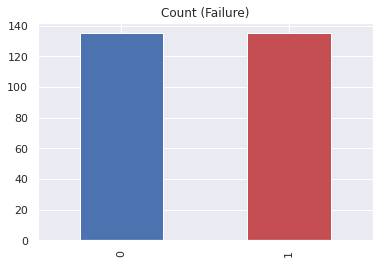

In [ ]:
df_no_failure_under_exp3 = df_no_failure_exp3.sample(count_failure_exp3)
dataset_exp3_train_under = pd.concat([df_no_failure_under_exp3 , df_failure_exp3], axis=0)

print('Random over-sampling:')
print(dataset_exp3_train_under['Machine failure'].value_counts())

my_colors = list(islice(cycle(['b', 'r']), None, len(dataset_exp3_train_under)))

dataset_exp3_train_under['Machine failure'].value_counts().plot(kind='bar', title='Count (Failure)', color=my_colors);

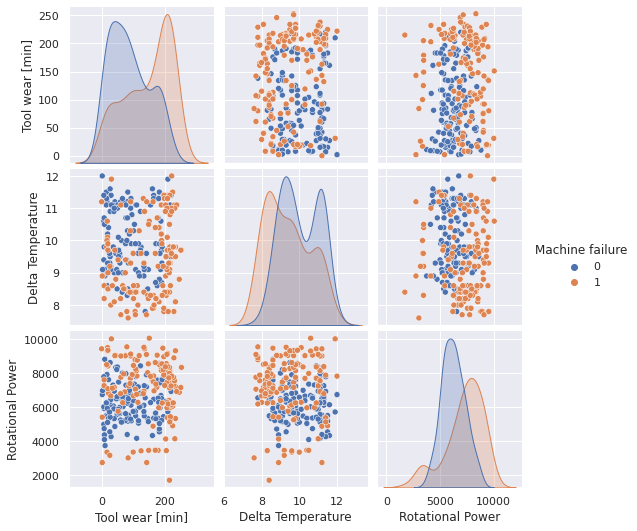

In [ ]:
sns.pairplot(dataset_exp3_train_under, hue='Machine failure')

In [ ]:
# split the data into inputs and outputs
X_exp3_train_under = dataset_exp3_train_under.iloc[:, [0,1,2]]
y_exp3_train_under = dataset_exp3_train_under.iloc[:, 3]

In [ ]:
#Train
print('\nTrain data\n')
y_exp3_train_under_Array=np.array(y_exp3_train_under)
np.count_nonzero(y_exp3_train_under_Array)
print('- No Failure:', y_exp3_train_under_Array[np.where(y_exp3_train_under_Array == 0)].size)
print('- Failure:', np.count_nonzero(y_exp3_train_under_Array))
print('Proportion:', round(y_exp3_train_under_Array[np.where(y_exp3_train_under_Array == 0)].size / np.count_nonzero(y_exp3_train_under_Array), 2), ': 1')


Train data

- No Failure: 135
- Failure: 135
Proportion: 1.0 : 1


##Gaussian Classifier

In [ ]:
# create a Gaussian Classifier
classifer_exp3 = GaussianNB()
# training the model
classifer_exp3.fit(X_exp3_train_under, y_exp3_train_under)
# testing the model
y_pred_exp3 = classifer_exp3.predict(X_test_exp3)

##Avaliação de resultados - Experimento 3

Avaliação dos resultados Experimento 3 - Random under-sampling

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      6378
           1       0.10      0.85      0.18       222

    accuracy                           0.74      6600
   macro avg       0.55      0.79      0.51      6600
weighted avg       0.96      0.74      0.82      6600



Text(0.5, 21.5, 'Prediction')

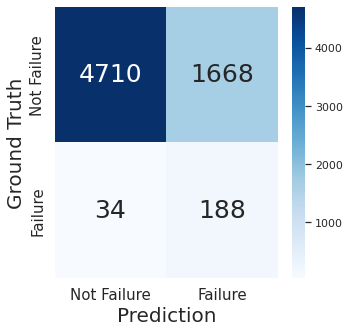

In [ ]:
print('Avaliação dos resultados Experimento 3 - Random under-sampling\n')
print(classification_report(y_test_exp3, y_pred_exp3))
M_exp3 = confusion_matrix(y_test_exp3, y_pred_exp3)
fig, ax = plt.subplots(figsize=(5,5))
#plt.title('Confusion matrix Balanced Bagging (test set)', fontsize=25)
ax = sns.heatmap(M_exp3, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 25, "weight": "normal"})

labels = ['Not Failure', 'Failure']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)

#Experimento 4 - Over-sampling: SMOTE(Dados de Treino)



##Preparação Experimento

In [ ]:
dataset_exp4 = pd.DataFrame()
dataset_exp4 = dataset_transf

In [ ]:
# split the data into inputs and outputs
X_exp4 = dataset_exp4.iloc[:, [0,1,2]]
y_exp4 = dataset_exp4.iloc[:, 3]

In [ ]:
# assign test data size 66%
X_train_exp4, X_test_exp4, y_train_exp4, y_test_exp4 =train_test_split(X_exp4,y_exp4,test_size= 0.66, random_state=100)

In [ ]:
#Test
y_test_Array_exp4=np.array(y_test_exp4)
np.count_nonzero(y_test_Array_exp4)
print('Test data\n')
print('- No Failure:', y_test_Array_exp4[np.where(y_test_Array_exp4 == 0)].size)
print('- Failure:', np.count_nonzero(y_test_Array_exp4))
print('Proportion:', round(y_test_Array_exp4[np.where(y_test_Array_exp4 == 0)].size / np.count_nonzero(y_test_Array_exp4), 2), ': 1')
print('\n***********************')
#Train
print('\nTrain data\n')
y_train_Array_exp4=np.array(y_train_exp4)
np.count_nonzero(y_train_Array_exp4)
print('- No Failure:', y_train_Array_exp4[np.where(y_train_Array_exp4 == 0)].size)
print('- Failure:', np.count_nonzero(y_train_Array_exp4))
print('Proportion:', round(y_train_Array_exp4[np.where(y_train_Array_exp4 == 0)].size / np.count_nonzero(y_train_Array_exp4), 2), ': 1')

Test data

- No Failure: 6379
- Failure: 221
Proportion: 28.86 : 1

***********************

Train data

- No Failure: 3264
- Failure: 136
Proportion: 24.0 : 1


##SMOTE

In [ ]:
smote = SMOTE()
X_train_exp4_smote,y_train_exp4_smote = smote.fit_resample(X_train_exp4,y_train_exp4)

In [ ]:
#Train
print('\nSMOTE Train data\n')
y_exp4_train_smote_Array=np.array(y_train_exp4_smote)
np.count_nonzero(y_exp4_train_smote_Array)
print('- No Failure:', y_exp4_train_smote_Array[np.where(y_exp4_train_smote_Array == 0)].size)
print('- Failure:', np.count_nonzero(y_exp4_train_smote_Array))
print('Proportion:', round(y_exp4_train_smote_Array[np.where(y_exp4_train_smote_Array == 0)].size / np.count_nonzero(y_exp4_train_smote_Array), 2), ': 1')


SMOTE Train data

- No Failure: 3264
- Failure: 3264
Proportion: 1.0 : 1


In [ ]:
dataset_exp4_smote_train= X_train_exp4_smote.join(y_train_exp4_smote)

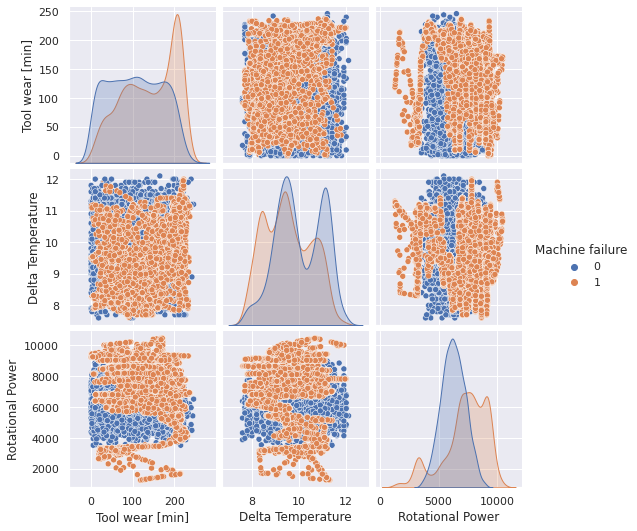

In [ ]:
sns.pairplot(dataset_exp4_smote_train, hue='Machine failure')

In [ ]:
# split the data into inputs and outputs
X_exp4_train_smote = dataset_exp4_smote_train.iloc[:, [0,1,2]]
y_exp4_train_smote = dataset_exp4_smote_train.iloc[:, 3]

## Gauss NB

In [ ]:
# create a Gaussian Classifier
classifer_exp4 = GaussianNB()
# training the model
classifer_exp4.fit(X_exp4_train_smote, y_exp4_train_smote)
# testing the model
y_pred_exp4 = classifer_exp4.predict(X_test_exp4)

##Avaliação de resultados - Experimento 4

Avaliação dos resultados Experimento 4 - Dataset Original

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      6379
           1       0.11      0.83      0.20       221

    accuracy                           0.78      6600
   macro avg       0.55      0.80      0.54      6600
weighted avg       0.96      0.78      0.85      6600



Text(0.5, 21.5, 'Prediction')

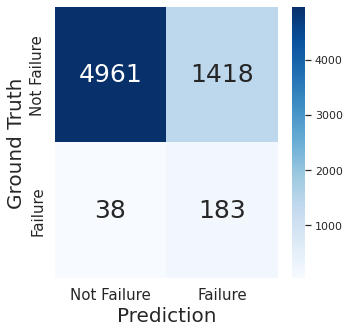

In [ ]:
print('Avaliação dos resultados Experimento 4 - SMOTE 1 \n')
print(classification_report(y_test_exp4, y_pred_exp4))
M_exp4 = confusion_matrix(y_test_exp4, y_pred_exp4)
fig, ax = plt.subplots(figsize=(5,5))
#plt.title('Confusion matrix Balanced Bagging (test set)', fontsize=25)
ax = sns.heatmap(M_exp4, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 25, "weight": "normal"})

labels = ['Not Failure', 'Failure']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)

#Experimento 5 - Over-sampling: SMOTE(Todos os dados)

##Preparação Experimento

In [ ]:
dataset_exp5 = pd.DataFrame()
dataset_exp5 = dataset_transf

In [ ]:
X_exp5 = dataset_exp5.iloc[:, [0,1,2]]
y_exp5 = dataset_exp5.iloc[:, 3]

In [ ]:
X_train_exp5_no_smote, X_test_exp5_no_smote, y_train_exp5_no_smote, y_test_exp5_no_smote =train_test_split(X_exp5,y_exp5,test_size= 0.99, random_state=1)

In [ ]:
smote = SMOTE()
X_exp5_smote,y_exp5_smote = smote.fit_resample(X_exp5,y_exp5)

In [ ]:
# assign test data size 66%
X_train_exp5, X_test_exp5, y_train_exp5, y_test_exp5 =train_test_split(X_exp5_smote,y_exp5_smote,test_size= 0.66, random_state=1)

In [ ]:
#Test
y_test_Array_exp5=np.array(y_test_exp5)
np.count_nonzero(y_test_Array_exp5)
print('Test data\n')
print('- No Failure:', y_test_Array_exp5[np.where(y_test_Array_exp5 == 0)].size)
print('- Failure:', np.count_nonzero(y_test_Array_exp5))
print('Proportion:', round(y_test_Array_exp5[np.where(y_test_Array_exp5 == 0)].size / np.count_nonzero(y_test_Array_exp5), 2), ': 1')
print('\n***********************')
#Train
print('\nTrain data\n')
y_train_Array_exp5=np.array(y_train_exp5)
np.count_nonzero(y_train_Array_exp5)
print('- No Failure:', y_train_Array_exp5[np.where(y_train_Array_exp5 == 0)].size)
print('- Failure:', np.count_nonzero(y_train_Array_exp5))
print('Proportion:', round(y_train_Array_exp5[np.where(y_train_Array_exp5 == 0)].size / np.count_nonzero(y_train_Array_exp5), 2), ': 1')

Test data

- No Failure: 6325
- Failure: 6404
Proportion: 0.99 : 1

***********************

Train data

- No Failure: 3318
- Failure: 3239
Proportion: 1.02 : 1


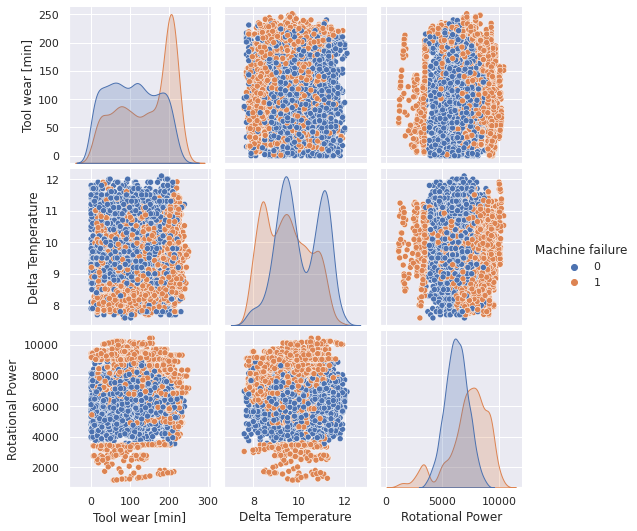

In [ ]:
dataset_exp5= X_train_exp5.join(y_train_exp5)
sns.pairplot(dataset_exp5, hue='Machine failure')

## Gauss NB

In [ ]:
# create a Gaussian Classifier
classifer_exp5 = GaussianNB()
# training the model
classifer_exp5.fit(X_train_exp5, y_train_exp5)
# testing the model
y_pred_exp5 = classifer_exp5.predict(X_test_exp5_no_smote)

##Avaliação de resultados - Experimento 5

Avaliação dos resultados Experimento 5 - SMOTE 2

              precision    recall  f1-score   support

           0       0.99      0.78      0.88      9548
           1       0.13      0.84      0.22       352

    accuracy                           0.79      9900
   macro avg       0.56      0.81      0.55      9900
weighted avg       0.96      0.79      0.85      9900



Text(0.5, 21.5, 'Prediction')

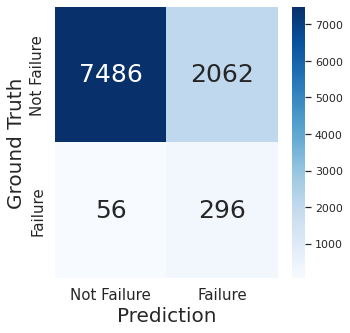

In [ ]:
print('Avaliação dos resultados Experimento 5 - SMOTE 2\n')
print(classification_report(y_test_exp5_no_smote, y_pred_exp5))
M_exp5 = confusion_matrix(y_test_exp5_no_smote, y_pred_exp5)
fig, ax = plt.subplots(figsize=(5,5))
#plt.title('Confusion matrix Balanced Bagging (test set)', fontsize=25)
ax = sns.heatmap(M_exp5, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 25, "weight": "normal"})

labels = ['Not Failure', 'Failure']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)

#Comparativo - Experimentos

In [ ]:
print('Avaliação dos resultados Experimento 1 - Dataset Original\n')
print(classification_report(y_test_exp1, y_pred_exp1))
print('Avaliação dos resultados Experimento 2 - Oversample\n')
print(classification_report(y_test_exp2, y_pred_exp2))
print('Avaliação dos resultados Experimento 3 - Undersample\n')
print(classification_report(y_test_exp3, y_pred_exp3))
print('Avaliação dos resultados Experimento 4 - SMOTE\n')
print(classification_report(y_test_exp4, y_pred_exp4))
print('Avaliação dos resultados Experimento 5 - SMOTE em todo o dataset\n')
print(classification_report(y_test_exp5_no_smote, y_pred_exp5))


Avaliação dos resultados Experimento 1 - Dataset Original

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6357
           1       0.95      0.09      0.16       243

    accuracy                           0.97      6600
   macro avg       0.96      0.54      0.57      6600
weighted avg       0.97      0.97      0.95      6600

Avaliação dos resultados Experimento 2 - Oversample

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      6378
           1       0.13      0.85      0.22       222

    accuracy                           0.80      6600
   macro avg       0.56      0.82      0.55      6600
weighted avg       0.96      0.80      0.86      6600

Avaliação dos resultados Experimento 3 - Undersample

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      6378
           1       0.10      0.85      0.18       222

    accuracy    